In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
import joblib

# Load the dataset
data = pd.read_csv("Transformed_Developer_Survey_Data.csv")

# Separate features and target variable
X = data.drop("TotalComp", axis=1)
y = data["TotalComp"]

# Convert categorical features to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# Transform the target variable
pt = PowerTransformer(method='yeo-johnson')
y = pt.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with parameter tuning
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Select the best model
best_forest_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_forest_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

# Save the model and scalers
joblib.dump(best_forest_model, "best_forest_model_optimized.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pt, "power_transformer.pkl")

# Save model columns
model_columns = X.columns.tolist()
joblib.dump(model_columns, "model_columns_optimized.pkl")
pd.DataFrame(model_columns, columns=["Feature"]).to_csv("model_columns_optimized.csv", index=False)

print("Model and supporting files saved successfully.")


Mean Absolute Error: 0.5776417930541182
Mean Squared Error: 0.5947713681872336
R^2 Score: 0.374150234250784
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Model and supporting files saved successfully.


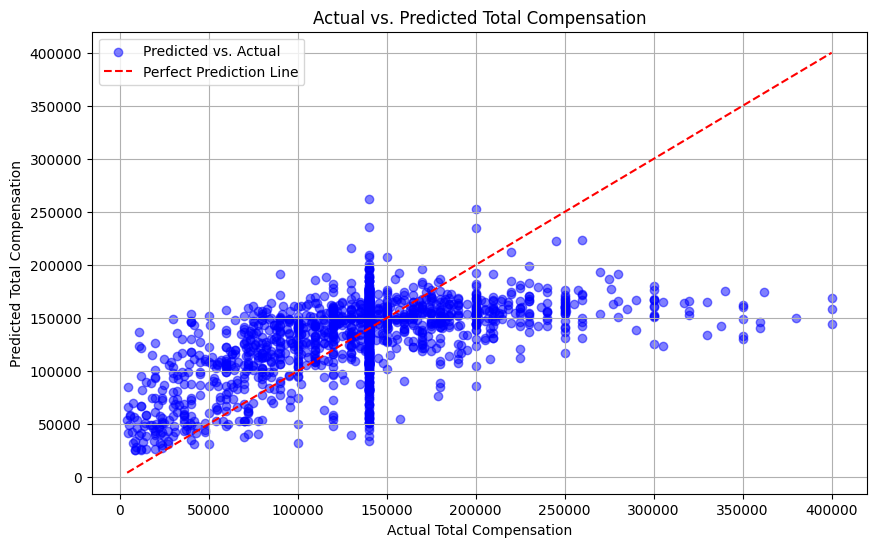

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Re-transform the predictions and test target to the original scale
y_test_original = pt.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = pt.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Plotting Actual vs Predicted Total Compensation
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Actual vs. Predicted Total Compensation")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load data
data = pd.read_csv("Transformed_Developer_Survey_Data.csv")

# Separate features and target variable
X = data.drop("TotalComp", axis=1)  # Drop target variable
y = data["TotalComp"]

# Ensure relevant columns are numeric, handling any non-numeric values
def convert_to_numeric(column):
    # Remove any non-numeric characters or replace with NaN
    X[column] = pd.to_numeric(X[column], errors='coerce')
    
# Apply conversion to relevant columns
for col in ['YearsCode', 'OrgSize', 'EdLevel', 'WorkExp']:
    convert_to_numeric(col)

# Handle any NaN values after conversion
X = X.fillna(0)  # Replace NaNs with 0 (or consider X.dropna() to drop these rows)

# Create interaction features
X['YearsCode_OrgSize'] = X['YearsCode'] * X['OrgSize']
X['EdLevel_WorkExp'] = X['EdLevel'] * X['WorkExp']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Save the model, scaler, and columns
joblib.dump(rf_model, "best_forest_model_optimized.pkl")
joblib.dump(scaler, "scaler.pkl")
model_columns = X.columns.tolist()  # Save model columns for later use
joblib.dump(model_columns, "model_columns_optimized.pkl")
pd.DataFrame(model_columns, columns=["Feature"]).to_csv("model_columns_optimized.csv", index=False)


Mean Absolute Error: 35991.304908381695
Mean Squared Error: 2373288783.668624
R^2 Score: 0.3301325184068792


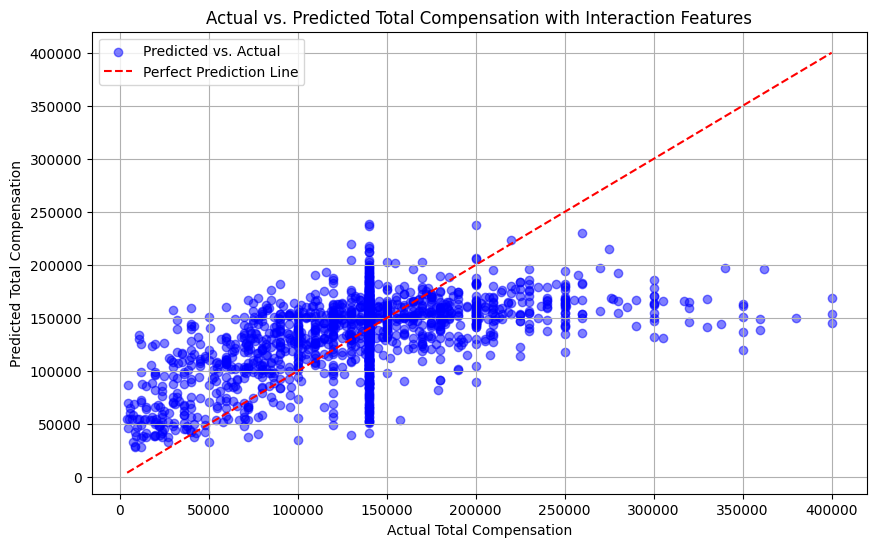

In [8]:
import matplotlib.pyplot as plt

# Assuming `y_test` and `y_pred` are the actual and predicted values
# Plotting Actual vs Predicted Total Compensation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel("Actual Total Compensation")
plt.ylabel("Predicted Total Compensation")
plt.title("Actual vs. Predicted Total Compensation with Interaction Features")
plt.legend()
plt.grid(True)
plt.show()
